![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

# Annotations, Colorbars, and Advanced Layouts

---
## Overview
- Adding annotations
- Rendering equations
- Colormap overview 
- Basic colorbars 
- Shared colorbars
- Custom colorbars
- Mosaic subplots

## Prerequisites


| Concepts | Importance |
| --- | --- |
| Basic familiarity with [NumPy](../numpy/numpy-basics) | Necessary |
| Basic familiarity with [Matplotlib](matplotlib) | Necessary |

- **Time to learn**: *30-40 minutes*

## Imports
Here, we import `matplotlib`, `numpy`, and `scipy` (to generate some sample data)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Normalize

## Create Some Sample Data
Using `scipy.stats`, we can create a normal distribution! Notice how nicely centered and normal our distribution is!

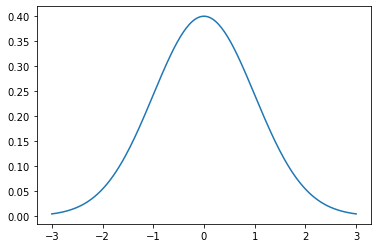

In [3]:
mu = 0
variance = 1
sigma = np.sqrt(variance)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 200)
pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf);

## Adding Annotations
A common part of many people's workflows is adding annotations, or "a note of explanation or comment added to a text or diagram."

We can do this using `plt.text` which takes the inputs of the `(x, y)` float text position in data coordinates and the text string.

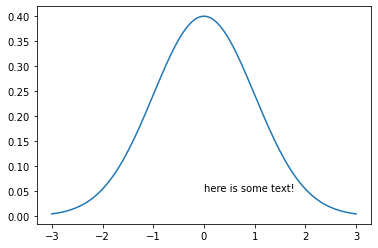

In [4]:
plt.plot(x, pdf)
plt.text(0, 0.05, 'here is some text!');

## Rendering Equations

We can even add **math text**, using Latex syntax. The key is use strings with following format:

```python
r'$some_equation$'
```

Here is the example equation we use!

$$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

If you are interested in learning more about Latex syntax, check out [their official documentation](https://latex-tutorial.com/tutorials/amsmath/).

Further, if you’re running the notebook interactively (e.g. on Binder) you can double click on the cell to see the latex source for the rendered equation.

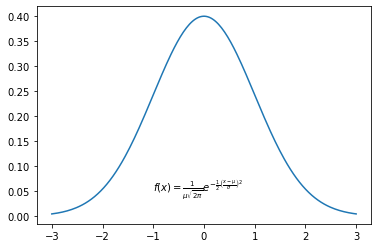

In [5]:
plt.plot(x, pdf)

plt.text(
    -1,
    0.05,
    r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$',
);

We plotted our equation! But it looks pretty small; we can increase the size of the text, and center the equation by using `fontsize` and `ha` (horizontal alignment).

This next example also uses latex notation in the legend text.

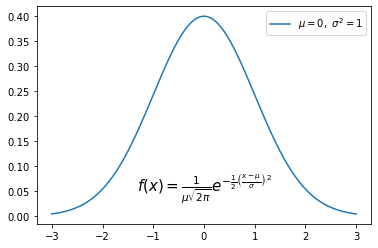

In [6]:
fstr = r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'

plt.plot(x, pdf, label=r'$\mu=0, \,\, \sigma^2 = 1$')
plt.text(0, 0.05, fstr, fontsize=15, ha='center')
plt.legend();

### Add a Box Around the Text

One other thing we can add here, for readability, is a box around the text, using `bbox`.

The `bbox` argument in `plt.text` uses a dictionary to create the box! We pass in:
* a rounded box sytle (`boxstyle = 'round'`)
* a light grey facecolor (`fc = 'lightgrey'`)
* a black edgecolor (`ec = 'k'`)

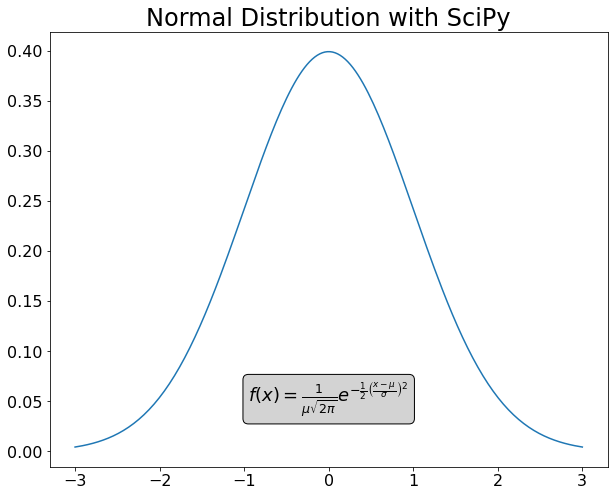

In [7]:
fig = plt.figure(figsize=(10, 8))
plt.plot(x, pdf)

fstr = r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'
plt.text(
    0,
    0.05,
    fstr,
    fontsize=18,
    ha='center',
    bbox=dict(boxstyle='round', fc='lightgrey', ec='k'),
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Normal Distribution with SciPy", fontsize=24);

---

## Colormap Overview

### Classes of colormaps

Click the dropdown arrow to see examples of colormaps within their respective classes.

<details>
<summary> 1. <b>Sequential:</b> change in lightness and/or saturation of color incrementally. Good for data that has ordering. </summary>

![Perceptually Sequential](images/perceptually-sequential.png)

![Sequential](images/sequential.png)

![Sequential2](images/sequential2.png)

![Perceptually Sequential](images/ps.png)

![Sequential](images/s1.png)

![Sequential2](images/s2.png)
</details>

<details>
    <summary> 2. <b>Diverging:</b> change in lightness and/or saturation of two different colors that meet in the middle at an unsaturated color. Should be used when the data has a natural zero point, such as sea level. </summary>

![Diverging](images/diverging.png)

![Diverging](images/d.png)
</details>

<details>
    <summary> 3. <b>Cyclic:</b> change in lightness of two different colors that meet in the middle and begin and end at an unsaturated color. Should be used for values that naturally wrap around. </summary>

![Cyclic](images/cyclic.png)

![Cyclic](images/c.png)
</details>

<details>
    <summary> 4. <b>Qualitative:</b> miscellaneous color. Should not be used for data that has ordering or relationships. </summary>

![Qualitative](images/qualitative.png)

![Miscellanous](images/misc.png)

![Miscellanous](images/m.png)
</details>

### Other considerations

There is a lot of info about choosing colormaps that could be its own tutorial. Two important considerations:
1. Color blind friendly patterns: avoiding colormaps with both red and green can account for the most common form of color blindness. The GeoCAT-examples gallery has a section devoted to [picking better colormaps](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html#colors) that covers this.

1. Grayscale conversion: It is not uncommon for plots rendered in color to be printed in black and white, obscuring the usefulness of a chosen colormap

![hsv colormap in grayscale](images/hsv2gray.png)

- See [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for a more in depth version of this section

## Basic Colorbars

Before we look at a colorbar, let's generate some fake data using `numpy.random`

In [8]:
npts = 1000
nbins = 15

x = np.random.normal(size=npts)
y = np.random.normal(size=npts)

Here, we plot a 2D histogram using our fake data, using the default colorbar "viridis"

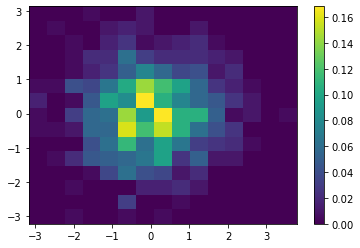

In [9]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True)
plt.colorbar();

We can change which colorbar to use by passing in `cmap = 'colorbar_name'`. We can use the `magma` colorbar instead!

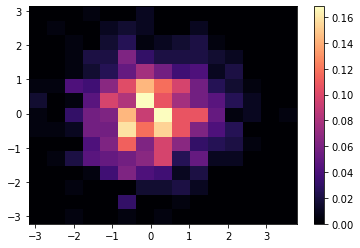

In [10]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True, cmap='magma')
plt.colorbar();

### Shared Colorbars
Often times, you are not plotting a single axis. You may wish to share colorbars between different plots! We can share colorbars between two plots using the following:

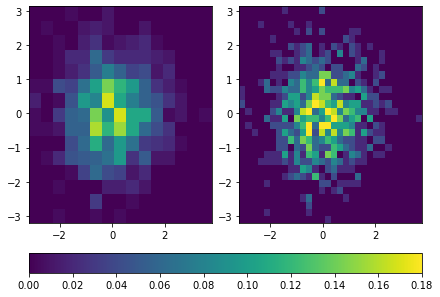

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, vmax=0.18)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, vmax=0.18)

fig.colorbar(hist1[3], ax=ax, location='bottom')

You may have noticed the input argument `hist1[3]` to `fig.colorbar`. This is subplot syntax, as you have seen in the previous Matplotlib content.

## Custom Colorbars

Even with the large collection of prepackaged colorbars, you may find it useful to create your own colorbar.

Below are 2 similar examples of using custom colorbars: 

The first has very discrete list of colors called `colors`, an creates a colormap from this list with the call `ListedColormap`. 

The second used the call `LinearSegmentedColormap` to create a colormap from interpolating the same list `colors`.

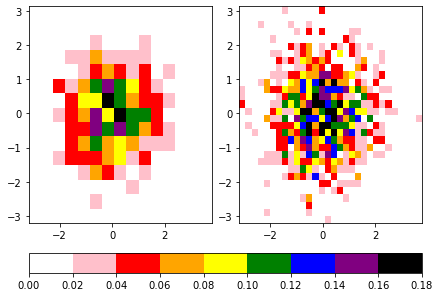

In [12]:
colors = [
    'white',
    'pink',
    'red',
    'orange',
    'yellow',
    'green',
    'blue',
    'purple',
    'black',
]
ccmap = ListedColormap(colors)
norm = Normalize(vmin=0, vmax=0.18)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=ccmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=ccmap, norm=norm)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

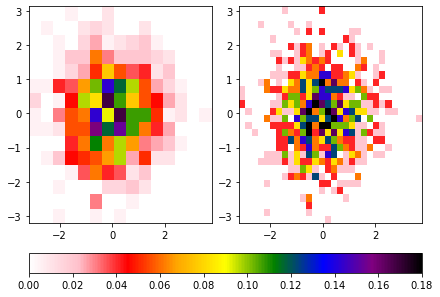

In [13]:
cbcmap = LinearSegmentedColormap.from_list("cbcmap", colors)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

## Mosaic Subplots
One of the recent features added to matplotlib is `subplot_mosaic` where you can pass the structure of your figure, and it will generate your subplots automatically!

For example, if we wanted two plots on top, and one of the bottom, we can construct it using the following block of text:

```python
""
AB
CC
""
```

This corresponds to three axes: `A`, `B`, and `C` with `A` and `B` on top of `C`.

Once we create the subplots, we can access them using the resultant axes dictionary, with the syntax `axes_dict['your_axis']`. An example of this is given below!

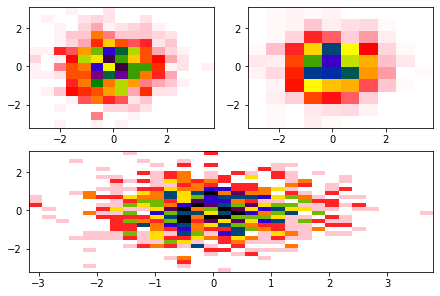

In [14]:
axdict = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CC
    """
)

histA = axdict['A'].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
histB = axdict['B'].hist2d(x, y, bins=10, density=True, cmap=cbcmap, norm=norm)
histC = axdict['C'].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

You'll notice there is not a colorbar plotted by default. When constructing the colorbar, we need to specify:
* Which plot to use for the colormapping (ex. `histA`)
* Which axes to merge colorbars across (ex. [`histA`, `histB`])
* Where to place the colorbar (ex. `bottom`)

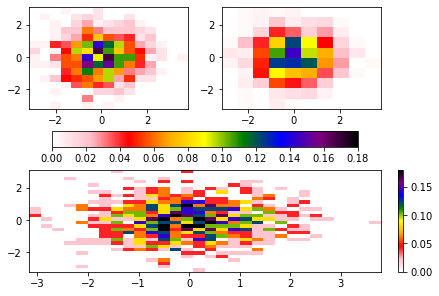

In [15]:
axdict = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CC
    """
)

histA = axdict['A'].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
histB = axdict['B'].hist2d(x, y, bins=10, density=True, cmap=cbcmap, norm=norm)
histC = axdict['C'].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

fig.colorbar(histA[3], ax=[axdict['A'], axdict['B']], location='bottom')
fig.colorbar(histC[3], ax=[axdict['C']], location='right');

---

## Summary
* You can use features in `matplotlib` to add annotations, even math, to your plots
* There are a number of considerations to take into account when choosing your colormap
* You can create your own colormaps with `matplotlib`
* Various axes in figures can share colorbars
    
## Additional Resources
- [Matplotlib text documentation](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_math_fontfamily)
- [Matplotlib annotation documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)
- [Matplotlib's annotation examples](https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py)
- [Writing mathmatical expressions in matplotlib](https://matplotlib.org/stable/tutorials/text/mathtext.html)
- [Mathtext Examples](https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_examples.html#sphx-glr-gallery-text-labels-and-annotations-mathtext-examples-py)
- [Drawing fancy boxeas with matplotlib](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)
- [Plot Types Cheat Sheet](https://lnkd.in/dD5fE8V)
- [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Making custom colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html)
- [Complex figure and subplot composition](https://matplotlib.org/stable/tutorials/provisional/mosaic.html#)